# Digit recognition using ANN

Imports

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.models import Layer
from matplotlib import pyplot as plt
import os
import cv2

### Importing dataset

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

### Training and Testing set and scaling

In [3]:
trainX.shape, testX.shape
trainX  = trainX/255
testX = testX/255

### Plotting digit from dataset

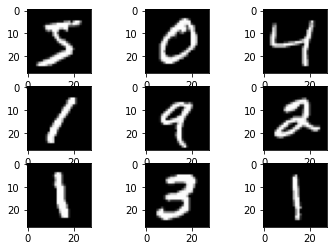

In [4]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

Building the ANN model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model fitting and Predicting

In [14]:
model.fit(trainX, trainy, epochs=3)

prediction = model.predict(testX)

test_loss , test_acc = model.evaluate(testX, testy)

Epoch 1/3
1875/1875 [==============================] - 2s 829us/step - loss: 0.0078 - accuracy: 0.9975
Epoch 2/3
1875/1875 [==============================] - 1s 795us/step - loss: 0.0080 - accuracy: 0.9974
Epoch 3/3
313/313 [==============================] - 0s 929us/step - loss: 0.0980 - accuracy: 0.9784


Testing Predictions

0  : 7
1  : 2
2  : 1
3  : 0
4  : 4
5  : 1
6  : 4
7  : 9
8  : 5


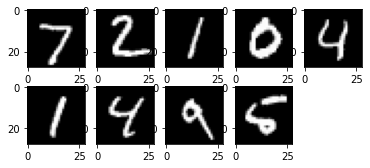

In [7]:
for i in range(9):
	print(i,' :', np.argmax(prediction[i]))
	plt.subplot(350 + 1 + i)
	plt.imshow(testX[i], cmap=plt.get_cmap('gray'))
plt.show()

# %%

The number is probably a 8


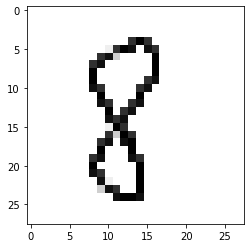

In [8]:
no = int(input('Enter the file no'))
os.path.isfile('Digits/digit{}.png'.format(no))
try:
    img = cv2.imread('digits/digit{}.png'.format(no))[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print("The number is probably a {}".format(np.argmax(prediction)))
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
except:
    print("Error reading image")